# Titanic Survivor Prediction Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.drop('Cabin', axis=1, inplace = True)

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [7]:
df.PassengerId.describe()

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

In [8]:
df.drop('PassengerId',axis=1, inplace=True)

In [9]:
df.drop('Name', axis=1,inplace=True)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [11]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [12]:
plot_data= df[df['Survived'] == 1]['Embarked'].value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64


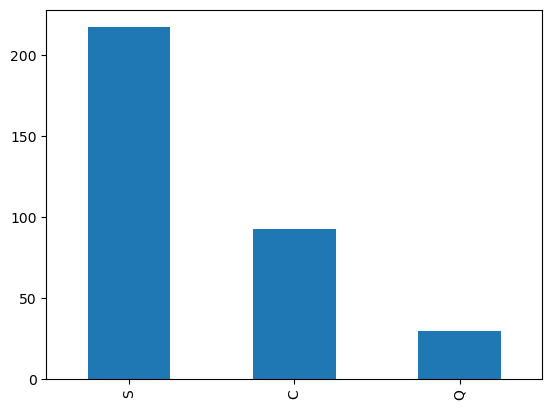

In [13]:
plot_data.plot(kind='bar')
print(plot_data)

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [15]:
df.Ticket.value_counts(0)

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [16]:
df[df['Ticket'] == 347082]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [17]:
df[df['Ticket'] == '347082']


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
13,0,3,male,39.0,1,5,347082,31.275,S
119,0,3,female,2.0,4,2,347082,31.275,S
541,0,3,female,9.0,4,2,347082,31.275,S
542,0,3,female,11.0,4,2,347082,31.275,S
610,0,3,female,39.0,1,5,347082,31.275,S
813,0,3,female,6.0,4,2,347082,31.275,S
850,0,3,male,4.0,4,2,347082,31.275,S


In [18]:
dff= pd.read_csv('titanic.csv')

In [19]:
dff[dff['Ticket'] == '347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [20]:
dff[dff['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [21]:
dff[dff['Ticket'] == '1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


In [22]:
dff['FirstWord'] = dff['Name'].str.split().str[0]

In [23]:
dff.FirstWord.value_counts()

Andersson,    9
Sage,         7
Goodwin,      6
Johnson,      6
Skoog,        6
             ..
Fleming,      1
Saalfeld,     1
Hanna,        1
Lewy,         1
Dooley,       1
Name: FirstWord, Length: 661, dtype: int64

In [24]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


result = np.where(condition, "True", "False")
print(result)


In [26]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
df.Sex= np.where(df.Sex== 'male',1,0)

In [28]:
df.drop('Ticket', axis=1,inplace=True )

In [29]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
df['Embarked']=np.where(df['Embarked']=='S',1,
         np.where(df['Embarked']=='C',2,
          np.where(df['Embarked'] == 'Q',3,df['Embarked'])))

In [31]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [32]:
df=df.dropna()

In [33]:
df.Embarked = df.Embarked.astype(int)

C:\Users\admin\AppData\Local\Temp\ipykernel_8388\2369496371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Embarked = df.Embarked.astype(int)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    int32  
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 44.5 KB


In [35]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [36]:
x= df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]


In [37]:
y= df.Survived

In [38]:
from sklearn.model_selection import train_test_split as tts

In [39]:
x_train, x_test, y_train, y_test = tts(x,y, test_size=.25)

In [40]:
print(f'x_train = {(x_train.shape)}')
print(f'x_test = {(x_test.shape)}')
print(f'y_train = {(y_train.shape)}')
print(f'y_test = {(y_test.shape)}')

x_train = (534, 7)
x_test = (178, 7)
y_train = (534,)
y_test = (178,)


# 1) logistic_model

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logistic_model = LogisticRegression()

In [43]:
logistic_model.fit(x_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
logi_train_score = logistic_model.score(x_train,y_train)
logi_test_score = logistic_model.score(x_test,y_test)

In [45]:
print(f'train Data score = {logistic_model.score(x_train,y_train)}')
print(f'test Data score = {logistic_model.score(x_test,y_test)}')

train Data score = 0.8202247191011236
test Data score = 0.797752808988764


In [46]:
logi_y_pred=logistic_model.predict(x_test)

In [47]:
logi_score=logistic_model.score(x_test,y_test)

In [48]:
 from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_test,logi_y_pred,labels=(1,0))

array([[46, 25],
       [11, 96]], dtype=int64)

In [50]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score as rc
from sklearn.metrics import precision_score as ps


print(classification_report(y_test,logi_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       107
           1       0.81      0.65      0.72        71

    accuracy                           0.80       178
   macro avg       0.80      0.77      0.78       178
weighted avg       0.80      0.80      0.79       178



In [51]:
logi_F1 = f1_score(y_test,logi_y_pred)

In [52]:
print(f'F1 Score = {logi_F1}')

F1 Score = 0.7187500000000001


In [53]:
rcs=rc(y_test,logi_y_pred)

In [54]:
pss=ps(y_test,logi_y_pred)

In [55]:
 2*( (pss*rcs)/(pss+rcs))

0.7187500000000001

# 2) D_T_model

In [56]:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [57]:
D_T_model = dtc()

In [58]:
param_grid={
    'criterion' : ["gini", "entropy"],
    'splitter' : ["best", "random"],
    'max_depth' : [None,10,20,30,40,50],
    'min_samples_split' : [1,2,4,5,10],
     'min_samples_leaf' : [1,3,6,9,5]
}

In [59]:
grid_search = GridSearchCV(D_T_model, param_grid, scoring='accuracy') 

In [60]:
grid_search.fit(x_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 3, 6, 9, 5],
                         'min_samples_split': [1, 2, 4, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [61]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [62]:
y_pred = best_model.predict(x_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred)

In [64]:
print("Best Parameters:", best_params)
print("Test Accuracy with Best Model:", accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'random'}
Test Accuracy with Best Model: 0.7415730337078652


In [65]:
D_T_model = dtc(criterion = 'entropy', max_depth= 30, min_samples_leaf = 5, min_samples_split = 5, splitter = 'random')

In [66]:
D_T_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=5,
                       min_samples_split=5, splitter='random')

In [67]:
DT_score=D_T_model.score(x_test, y_test)

In [68]:
DT_train_score = D_T_model.score(x_train,y_train)
DT_test_score = D_T_model.score(x_test,y_test)

In [69]:
print(f'Train data score= {D_T_model.score(x_train,y_train)}')
print(f'Test data score= {D_T_model.score(x_test,y_test)}')

Train data score= 0.8651685393258427
Test data score= 0.7584269662921348


In [70]:
DT_ypred = D_T_model.predict(x_test)

In [71]:
confusion_matrix(y_test,DT_ypred,labels=(1,0))

array([[36, 35],
       [ 8, 99]], dtype=int64)

In [72]:
print(classification_report(y_test,DT_ypred))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82       107
           1       0.82      0.51      0.63        71

    accuracy                           0.76       178
   macro avg       0.78      0.72      0.72       178
weighted avg       0.77      0.76      0.74       178



In [73]:
DT_F1= f1_score(y_test,DT_ypred)

# 3)Random Forest
RF_model

In [74]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [75]:
RF_model=rfc()

In [76]:
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [77]:
grid_search = GridSearchCV(RF_model, param_grid, scoring='accuracy') 

In [78]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [79]:
rf_best_params = grid_search.best_params_
rf_best_model = grid_search.best_estimator_

In [80]:
y_pred = rf_best_model.predict(x_test)

In [81]:
accuracy = accuracy_score(y_test, y_pred)

In [82]:
print("Best Parameters:", best_params)
print("Test Accuracy with Best Model:", accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'random'}
Test Accuracy with Best Model: 0.7921348314606742


In [83]:
RF_model=rfc(criterion=  'gini', max_depth = None, min_samples_leaf = 9, min_samples_split = 10)

In [84]:
RF_model.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=9, min_samples_split=10)

In [85]:
RF_train_score = RF_model.score(x_train, y_train)
RF_test_score = RF_model.score(x_test, y_test)

In [86]:
print(f'score on train data = {RF_model.score(x_train, y_train)}')
print(f'score on test data = {RF_model.score(x_test, y_test)}')

score on train data = 0.8558052434456929
score on test data = 0.7808988764044944


In [87]:
RF_score = RF_model.score(x_test, y_test)

In [88]:
RF_ypred = RF_model.predict(x_test)

In [89]:
confusion_matrix(y_test,RF_ypred,labels=(1,0))

array([[ 37,  34],
       [  5, 102]], dtype=int64)

In [90]:
print(classification_report(y_test,RF_ypred))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       107
           1       0.88      0.52      0.65        71

    accuracy                           0.78       178
   macro avg       0.82      0.74      0.75       178
weighted avg       0.80      0.78      0.77       178



In [91]:
RF_F1= f1_score(y_test,RF_ypred)

# 4) SVM
svm_model

In [94]:
from sklearn import svm

In [95]:
svm_model = svm.SVC()
svm_model.fit(x_train,y_train)
svm_train_score = svm_model.score(x_train, y_train)
svm_test_score = svm_model.score(x_test, y_test)
print(f'Train data score = {svm_train_score}')
print(f'Test data score = {svm_test_score}')

Train data score = 0.6853932584269663
Test data score = 0.6404494382022472


In [96]:
svm_ypred = svm_model.predict(x_test)

In [97]:
confusion_matrix(y_test, svm_ypred, labels = (1,0) )

array([[22, 49],
       [15, 92]], dtype=int64)

In [98]:
print(classification_report(y_test, svm_ypred))

              precision    recall  f1-score   support

           0       0.65      0.86      0.74       107
           1       0.59      0.31      0.41        71

    accuracy                           0.64       178
   macro avg       0.62      0.58      0.57       178
weighted avg       0.63      0.64      0.61       178



In [99]:
svm_F1= f1_score(y_test, svm_ypred)

# 5) K-Nearest Neighbors (KNN)
knn_model

In [100]:
from sklearn.neighbors import KNeighborsClassifier as knnc

In [101]:
knn_model = knnc()

In [102]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [103]:
knn_gridsearch = GridSearchCV(knn_model, param_grid, scoring = 'accuracy')

In [104]:
knn_gridsearch.fit(x_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [105]:
knn_best_params = knn_gridsearch.best_params_
knn_best_model = knn_gridsearch.best_estimator_
knngrid_ypred = knn_best_model.predict(x_test)
accuracy = accuracy_score(knngrid_ypred, y_test)

In [106]:
print(f'best parameters for model are {knn_best_params} ')
print(f'Accuracy of Model with params are {accuracy}')

best parameters for model are {'n_neighbors': 9, 'p': 1, 'weights': 'distance'} 
Accuracy of Model with params are 0.7078651685393258


In [107]:
knn_model = knnc(n_neighbors = 7, p =  1, weights = 'distance')

In [108]:
knn_model.fit(x_train, y_train)
knn_test_score = knn_model.score(x_train, y_train)
knn_train_score = knn_model.score(x_test, y_test)
print(f'score of model on train data = {knn_train_score}')
print(f'score of model on test data = {knn_test_score}')

score of model on train data = 0.6910112359550562
score of model on test data = 0.9887640449438202


In [109]:
knn_ypred = knn_model.predict(x_test)

In [110]:
confusion_matrix(y_test, knn_ypred, labels= (1,0))

array([[39, 32],
       [23, 84]], dtype=int64)

In [111]:
print(classification_report(y_test, knn_ypred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       107
           1       0.63      0.55      0.59        71

    accuracy                           0.69       178
   macro avg       0.68      0.67      0.67       178
weighted avg       0.69      0.69      0.69       178



In [112]:
knn_F1 = f1_score(y_test, knn_ypred)

# 6)Naive Bayes algorithms:¶
nb_model

In [113]:
from sklearn.naive_bayes import MultinomialNB as mulnb

In [114]:
nb_model = mulnb(alpha= .6)
nb_model.fit(x_train, y_train)
nb_train_score= nb_model.score(x_train, y_train)
nb_test_score = nb_model.score(x_test, y_test)
nb_ypred = nb_model.predict(x_test)
print(f'models score on train data = {nb_train_score}')
print(f'models score on test data = {nb_test_score}')

models score on train data = 0.700374531835206
models score on test data = 0.6629213483146067


In [115]:
confusion_matrix(y_test, nb_ypred, labels=(1,0))

array([[31, 40],
       [20, 87]], dtype=int64)

In [116]:
print(classification_report(y_test, nb_ypred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74       107
           1       0.61      0.44      0.51        71

    accuracy                           0.66       178
   macro avg       0.65      0.62      0.63       178
weighted avg       0.65      0.66      0.65       178



In [117]:
nb_F1= f1_score(y_test, nb_ypred)

# 7) Gradient Boosting algorithms:
GBC_model

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

In [119]:
GBC_model = GradientBoostingClassifier()

In [120]:
param_grid = {
    'n_estimators': [50, 100, 150],            # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.1, 0.2],         # Shrinkage of contribution of each tree
    'max_depth': [3, 4, 5],                    # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 1.0]                    # Fraction of samples used for fitting the trees
}

In [121]:
GBC_grid = GridSearchCV(GBC_model, param_grid, scoring = 'accuracy')

In [122]:
GBC_grid.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [123]:
GBC_best_param = GBC_grid.best_params_

In [124]:
GBC_best_model = GBC_grid.best_estimator_
GBC_grid_ypred = GBC_best_model.predict(x_test)
accuracy = accuracy_score(GBC_grid_ypred, y_test)

In [125]:
print(f'Best parameters for model is = {GBC_best_param}')
print(f'Best score of model is = {accuracy}')

Best parameters for model is = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}
Best score of model is = 0.8146067415730337


In [126]:
GBC_model =  GradientBoostingClassifier(learning_rate= 0.2, max_depth = 3,min_samples_leaf = 2, n_estimators = 50, subsample= 0.8 )

In [127]:
GBC_model.fit(x_train, y_train)
GBC_train_score= GBC_model.score(x_train, y_train)
GBC_test_score = GBC_model.score(x_test, y_test)
GBC_ypred = GBC_model.predict(x_test)
print(f'models score on train data = {GBC_train_score}')
print(f'models score on test data = {GBC_test_score}')

models score on train data = 0.9269662921348315
models score on test data = 0.8033707865168539


In [128]:
confusion_matrix(y_test,GBC_ypred,labels= (1,0))

array([[ 43,  28],
       [  7, 100]], dtype=int64)

In [129]:
print(classification_report(y_test, GBC_ypred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       107
           1       0.86      0.61      0.71        71

    accuracy                           0.80       178
   macro avg       0.82      0.77      0.78       178
weighted avg       0.81      0.80      0.80       178



In [130]:
gbc_F1 = f1_score(y_test, GBC_ypred)

# 8) xgboost
xgb_model

In [131]:
import xgboost as xgb

In [132]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [133]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting
    'n_estimators': [50, 100, 150],       # Number of boosting rounds
    'max_depth': [3, 4, 5],               # Maximum depth of a tree
    'subsample': [0.8, 1.0],              # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.8, 1.0],       # Fraction of features used for fitting the trees
    'gamma': [0, 0.1, 0.2],               # Minimum loss reduction required to make a further partition
}

In [134]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = 'accuracy')

In [135]:
xgb_grid.fit(x_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                

In [136]:
GBC_best_param = GBC_grid.best_params_
GBC_best_model = GBC_grid.best_estimator_
GBC_grid_ypred = GBC_best_model.predict(x_test)
accuracy = accuracy_score(GBC_grid_ypred, y_test)
print(f'Best parameters for model is = {GBC_best_param}')
print(f'Best score of model is = {accuracy}')

Best parameters for model is = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}
Best score of model is = 0.8146067415730337


In [137]:
xgb_model = xgb.XGBClassifier(learning_rate = 0.2, max_depth = 4, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 50, subsample = 0.8)

In [138]:
xgb_model.fit(x_train, y_train)
xgb_train_score= xgb_model.score(x_train, y_train)
xgb_test_score = xgb_model.score(x_test, y_test)
xgb_ypred = xgb_model.predict(x_test)
print(f'models score on train data = {xgb_train_score}')
print(f'models score on test data = {xgb_test_score}')

[12:35:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

models score on train data = 0.9213483146067416
models score on test data = 0.8146067415730337


In [139]:
confusion_matrix(y_test, xgb_ypred, labels = (1,0))

array([[47, 24],
       [ 9, 98]], dtype=int64)

In [140]:
print(classification_report(y_test, xgb_ypred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.84      0.66      0.74        71

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178



In [141]:
xgb_F1 = f1_score(y_test, xgb_ypred)
#gbc_F1 = f1_score(y_test, GBC_ypred)

# 9) RidgeClassifier
rdg_model

In [142]:
from sklearn.linear_model import RidgeClassifier

In [143]:
rdg_model = RidgeClassifier()
rdg_model.fit(x_train, y_train)

RidgeClassifier()

In [144]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0, 5.0, 10.0]  # Adjust based on your problem
}

In [145]:
rdg_grid = GridSearchCV(rdg_model, param_grid, scoring = 'accuracy')

In [146]:
rdg_grid.fit(x_train, y_train)

GridSearchCV(estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0, 5.0, 10.0]},
             scoring='accuracy')

In [147]:
rdg_best_param = rdg_grid.best_params_
rdg_best_model = rdg_grid.best_estimator_
rdg_grid_ypred = rdg_best_model.predict(x_test)
accuracy = accuracy_score(rdg_grid_ypred, y_test)
print(f'Best parameters for model is = {rdg_best_param}')
print(f'Best score of model is = {accuracy}')

Best parameters for model is = {'alpha': 10.0}
Best score of model is = 0.8033707865168539


In [148]:
rdg_model = RidgeClassifier(alpha = 5.0)

In [149]:
rdg_model.fit(x_train, y_train)
rdg_train_score= rdg_model.score(x_train, y_train)
rdg_test_score = rdg_model.score(x_test, y_test)
rdg_ypred = rdg_model.predict(x_test)
print(f'models score on train data = {rdg_train_score}')
print(f'models score on test data = {rdg_test_score}')

models score on train data = 0.8089887640449438
models score on test data = 0.7865168539325843


In [150]:
confusion_matrix(y_test, rdg_ypred, labels = (1,0))

array([[47, 24],
       [14, 93]], dtype=int64)

In [151]:
print(classification_report(y_test, rdg_ypred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       107
           1       0.77      0.66      0.71        71

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.79      0.79      0.78       178



In [152]:
rdg_F1=f1_score(y_test, rdg_ypred)

In [153]:
data = {
    'sr.no' : [1,2,3,4,5,6,7,8,9],
    'Model' : ['logistic_model', 'D_T_model', 'RF_model', 'svm_model', 'knn_model', 'nb_model', 'GBC_model', 'xgb_model', 'rdg_model'],
    'Algorithm': ['Loistic Regression', 'Decision Tree', 'Rendom Forest Classifier', 'SVM', 'KNN', 'Naive Bayes', 'GrediantBoostingClassifier', 'xgboost','RidgeClassifier'],
    'Train Score' : [logi_train_score, DT_train_score, RF_train_score, svm_train_score, knn_train_score, nb_train_score, GBC_train_score, xgb_train_score, rdg_train_score ],
    'Test Score' : [logi_test_score, DT_test_score, RF_test_score, svm_test_score, knn_test_score, nb_test_score,GBC_test_score, xgb_test_score, rdg_test_score ],
    'F1 score' : [logi_F1, DT_F1, RF_F1, svm_F1, knn_F1, nb_F1, gbc_F1, xgb_F1, rdg_F1 ]
}
score_table = pd.DataFrame(data)
score_table

,sr.no,Model,Algorithm,Train Score,Test Score,F1 score
0,1,logistic_model,Loistic Regression,0.820225,0.797753,0.718750
1,2,D_T_model,Decision Tree,0.865169,0.758427,0.626087
2,3,RF_model,Rendom Forest Classifier,0.855805,0.780899,0.654867
3,4,svm_model,SVM,0.685393,0.640449,0.407407
4,5,knn_model,KNN,0.691011,0.988764,0.586466
5,6,nb_model,Naive Bayes,0.700375,0.662921,0.508197
6,7,GBC_model,GrediantBoostingClassifier,0.926966,0.803371,0.710744
7,8,xgb_model,xgboost,0.921348,0.814607,0.740157
8,9,rdg_model,RidgeClassifier,0.808989,0.786517,0.712121


From the observating above given table We will choose xgboost As final model for further deployment process.

# Test data

In [156]:
test_data=pd.read_csv('titanic_test.csv')

In [157]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [158]:
test_data.drop('Cabin', axis=1, inplace = True)

In [159]:
test_data.drop('PassengerId',axis=1, inplace=True)

In [160]:
test_data.drop('Name',axis=1, inplace=True)

In [161]:
test_data.drop('Ticket', axis=1,inplace=True )

In [162]:
test_data['Embarked']=np.where(test_data['Embarked']=='S',1,
         np.where(test_data['Embarked']=='C',2,
          np.where(test_data['Embarked'] == 'Q',3,test_data['Embarked'])))

In [163]:
test_data.Sex= np.where(test_data.Sex== 'male',1,0)

In [164]:
Age_mean = test_data.Age.mean()

In [165]:
test_data.Age=test_data.Age.fillna(Age_mean)

In [166]:
test_data.Fare=test_data.Fare.fillna(test_data.Fare.mean())

In [167]:
test_data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 21.4+ KB


In [168]:
test_data.Embarked = test_data.Embarked.astype(int)

In [169]:
test_x= test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]

In [170]:
score_table

,sr.no,Model,Algorithm,Train Score,Test Score,F1 score
0,1,logistic_model,Loistic Regression,0.820225,0.797753,0.718750
1,2,D_T_model,Decision Tree,0.865169,0.758427,0.626087
2,3,RF_model,Rendom Forest Classifier,0.855805,0.780899,0.654867
3,4,svm_model,SVM,0.685393,0.640449,0.407407
4,5,knn_model,KNN,0.691011,0.988764,0.586466
5,6,nb_model,Naive Bayes,0.700375,0.662921,0.508197
6,7,GBC_model,GrediantBoostingClassifier,0.926966,0.803371,0.710744
7,8,xgb_model,xgboost,0.921348,0.814607,0.740157
8,9,rdg_model,RidgeClassifier,0.808989,0.786517,0.712121


In [171]:
prediction = rdg_model.predict(test_x)

In [172]:
test['Survived']=prediction

NameError: name 'test' is not defined

In [ ]:
test_data

In [ ]:
submission = test[['PassengerId', 'Survived']]

In [ ]:
test= pd.read_csv('titanic_test.csv')

In [ ]:
test

In [ ]:
submission

In [ ]:
submission.to_csv('Titanic_submission.csv')

In [ ]:
data = {
    'sr.no' : [1,2,3,4,5,6,7,8,9],
    'Model' : ['logistic_model', 'D_T_model', 'RF_model', 'svm_model', 'knn_model', 'nb_model', 'GBC_model', 'xgb_model', 'rdg_model'],
    'Algorithm': ['Loistic Regression', 'Decision Tree', 'Rendom Forest Classifier', 'SVM', 'KNN', 'Naive Bayes', 'GrediantBoostingClassifier', 'xgboost','RidgeClassifier'],
    'Train Score' : [logi_train_score, DT_train_score, RF_train_score, svm_train_score, knn_train_score, nb_train_score, GBC_train_score, xgb_train_score, rdg_train_score ],
    'Test Score' : [logi_test_score, DT_test_score, RF_test_score, svm_test_score, knn_test_score, nb_test_score,GBC_test_score, xgb_test_score, rdg_test_score ],
    'F1 Score' : [logi_F1, DT_F1, RF_F1, svm_F1, knn_F1, nb_F1, gbc_F1, xgb_F1, rdg_F1 ],
    'Kaggle Score' : [0.761, 0.779, 0.773, 0.665, 0.641, 0.663, 0.756, 0.763, 0.753 ]
}
score_table = pd.DataFrame(data)
score_table